In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prior(mu):
    return np.ones(len(mu))

def verosimilitud(x,mu,sigma):
    norm = 1/(2*np.pi*sigma**2)**(1/2)
    return np.exp(-(x-mu)**2/(2*sigma**2))*norm

def mu_sigma(x_k,sigma_k):
    w_k = sigma_k**-2
    mu = np.sum(x_k*w_k)/np.sum(w_k)
    sigma = np.sum(w_k)**(-1/2)
    return mu,sigma

In [20]:
mu = np.linspace(-20,20,1000)
#x_k = np.linspace(-10,15,10)
x_k = np.random.normal(loc=5.9,scale=0.8,size=20)
#x_k = np.array([4.6, 6.0, 2.0, 5.8])
#sigma_k = np.array( [2.0, 1.5, 5.0, 1.0])
sigma_k = np.linspace(1,5,len(x_k))


log_V = np.zeros(len(mu))

#print(verosimilitud(x_k[10],mu,sigma_k[10]))

for i in range(len(x_k)):
    log_V += np.log(verosimilitud(x_k[i],mu,sigma_k[i]))
    #print(V_i)

log_pos = log_V + np.log(prior(mu))
log_evidencia = np.amax(log_pos)

log_pos = log_pos-log_evidencia
posterior = np.exp(log_pos)
posterior = posterior/np.trapz(posterior,mu)

# Método 'manual' ---------------------------------------------
cero = np.argmax(log_pos)
mu_0 = mu[cero]
d2 = (log_pos[cero+1] - 2*log_pos[cero] + log_pos[cero-1]) / ((mu[cero]-mu[cero-1])**2)
sigma_0 = (-d2)**(-1/2)

# Método directo ----------------------------------------------
#mu_0,sigma_0 = mu_sigma(x_k,sigma_k)
print(mu_sigma(x_k,sigma_k))

(5.930176246316781, 0.47921519946275637)


In [21]:
lista = [np.mean(x_k)]

N = 20000
for i in range(1,N):
    propuesta_mu  = lista[i-1] + np.random.normal(loc=0, scale=5E-1)
    
    likely_nuevo = np.sum(np.log(verosimilitud(x_k,propuesta_mu,sigma_k)))
    likely_nuevo = likely_nuevo
    likely_viejo = np.sum(np.log(verosimilitud(x_k,lista[i-1],sigma_k)))
    likely_viejo = likely_viejo
    
    r = min(0,likely_nuevo-likely_viejo);
    alpha = np.random.random()
    if(alpha<=np.exp(r)):
        lista.append(propuesta_mu)
    else:
        lista.append(lista[i-1])
        
z = np.array(lista)
print(z.size)

20000


(array([0.00090085, 0.00090085, 0.00135127, 0.00225212, 0.00270255,
        0.00450425, 0.00630595, 0.01531445, 0.02432295, 0.03333145,
        0.04774505, 0.06260907, 0.07837394, 0.11756092, 0.13783004,
        0.18467424, 0.21169973, 0.24638246, 0.3103428 , 0.4004278 ,
        0.36889805, 0.45492922, 0.47700004, 0.50402554, 0.50807936,
        0.50762894, 0.51438531, 0.52249296, 0.51393489, 0.47204536,
        0.40403119, 0.36484422, 0.3283598 , 0.24818416, 0.19953826,
        0.19233146, 0.15494619, 0.09549009, 0.09143627, 0.05990652,
        0.04233995, 0.03198017, 0.02432295, 0.0162153 , 0.01126062,
        0.00450425, 0.00225212, 0.00090085, 0.0018017 , 0.00090085]),
 array([2.74819717, 2.85920345, 2.97020973, 3.08121601, 3.19222229,
        3.30322857, 3.41423485, 3.52524113, 3.63624741, 3.74725369,
        3.85825997, 3.96926625, 4.08027253, 4.19127881, 4.30228509,
        4.41329137, 4.52429765, 4.63530393, 4.74631021, 4.85731649,
        4.96832277, 5.07932905, 5.19033533, 5.

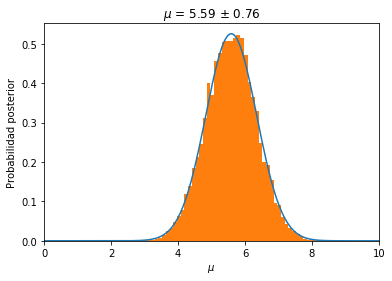

In [19]:
plt.figure()
plt.plot(mu,posterior)
plt.xlabel(r'$\mu$'.format())
plt.ylabel('Probabilidad posterior')
plt.xlim(0,10)
plt.title(r'$\mu$ = {:.2f} $\pm$ {:.2f}'.format(mu_0,sigma_0))

#plt.figure()
plt.hist(z,bins=50,rwidth=5,density=True)
#plt.xlim(0,10)